# Anwendungsbeispiel in der Bildverarbeitung
## Livewire
Der Livewire-Algorithmus wird sehr gerne zur *Bildsegmentierung* verwendet. Bei der Bildsegmentierung möchte man gerne bestimmte Bereiche eines Bildes hervorheben. Ein Beispiel ist die Segmentierung von Zellen in einem Mikroskopbild. Der Livewire-Algorithmus ist ein interaktiver Algorithmus, der dem Benutzer erlaubt, den Pfad zu beeinflussen, der durch das Bild gezogen wird. Der Algorithmus berechnet den Pfad, der die geringste "Energie" hat und dabei die vom Benutzer angegebenen Punkte berücksichtigt. Dies ermöglicht eine präzise Segmentierung von Objekten in Bildern.

Die Idee ist also, dass ein Forscher nicht mehr Pixel für Pixel den Pfad angeben muss, sondern nur noch einige Landmarken setzen muss. Livewire findet dann den sinnvollsten Weg zwischen den Landmarken anhand des *Kantenbilds*. Läuft der Pfad nicht auf einer Kante entlang, so soll er "bestraft" werden.

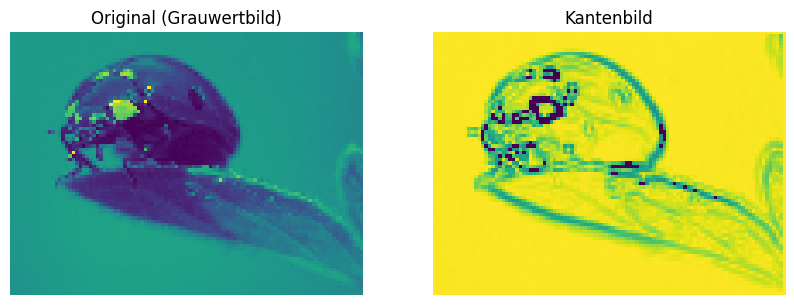

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from utils import a_stern_img, draw_path, load_img, kantenbild

img = "marienkaefer.jpg"
#img = "eule.jpg"

img = load_img("bilder/"+img)
max_pix = 100
downsample = int(np.max(img.shape)//max_pix)
img = img[::downsample, ::downsample]
kanten = kantenbild(img)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Original (Grauwertbild)")
plt.axis("off")
plt.imshow(img)
plt.subplot(1,2,2)
plt.title("Kantenbild")
plt.axis("off")
plt.imshow(kanten)
plt.show()

## Landmarken
Landmarken sind Punkte, die der Benutzer im Bild setzen kann, um den Pfad zu beeinflussen. Hierbei möchte man die Landmarken nicht zu weit auseinander wählen, damit der Algorithmus nicht so lange "suchen" muss. 

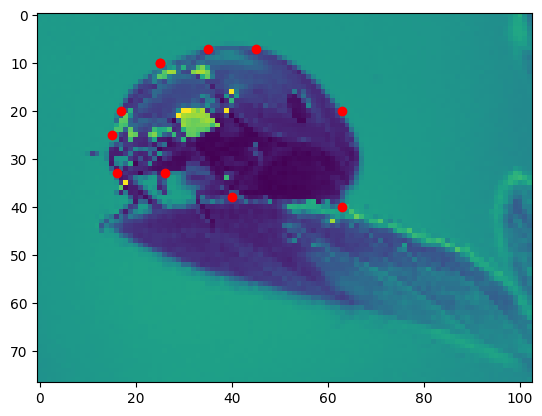

In [ ]:
eckpunkte = np.array([
    [10,25],
    [7,35],
    [7,45],
    [20,63],
    [40,63],
    [38,40],
    [33,26],
    [33,16],
    [25,15],
    [20,17],
    [10,25],
    ])

plt.figure()
plt.imshow(img)
for e in eckpunkte:
    plt.scatter(e[1], e[0], c="red")
plt.show()

Eckpunkt 1
Eckpunkt 2
Eckpunkt 3
Eckpunkt 4
Eckpunkt 5
Eckpunkt 6
Eckpunkt 7
Eckpunkt 8
Eckpunkt 9
Eckpunkt 10


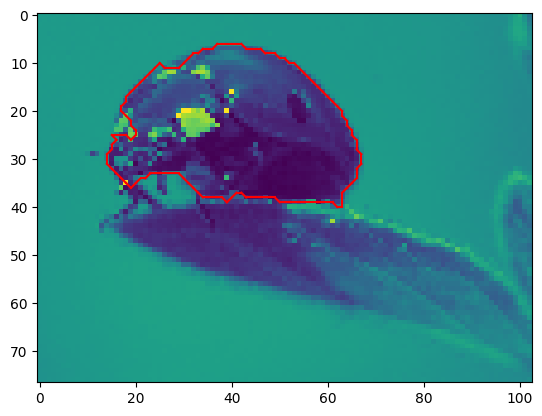

In [13]:
pfad = []
c = 0
h, w = img.shape
for start, ziel in zip(eckpunkte[:-1], eckpunkte[1:]):
    print("Eckpunkt",c:=c+1)
    distmat = np.linalg.norm(np.stack(np.meshgrid(np.arange(0,h), np.arange(0,w))).transpose(2,1,0)-ziel, axis=-1)
    heuristik = np.log(distmat+1e-8)
    p,*_ = a_stern_img(kanten, start, ziel, 0*heuristik)
    pfad.append(p)

plt.figure()
plt.imshow(img)
for p in pfad:
    draw_path(p, "red")
plt.show()